In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

import matplotlib




In [3]:
data = pd.read_csv('train.csv')

In [4]:
cd Data Science

[WinError 2] Das System kann die angegebene Datei nicht finden: 'Data Science'
C:\Users\Dennis\Downloads\Data Science\data


In [5]:
len(data)

3000

In [6]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [7]:
len(data.runtime)

3000

In [8]:
len(data.runtime==0)

3000

In [9]:
len(data[data.runtime==0])

12

In [10]:
len(data[data.runtime<45])

15

In [11]:
data_cleaned = data[data.runtime >= 15]

In [12]:
data_cleaned.describe()

,id,budget,popularity,runtime,revenue
count,2985.000000,2.985000e+03,2985.000000,2985.000000,2.985000e+03
mean,1499.087437,2.263160e+07,8.499661,108.322613,6.700569e+07
std,866.228531,3.709115e+07,12.123045,20.971242,1.378134e+08
min,1.000000,0.000000e+00,0.000001,40.000000,1.000000e+00
25%,749.000000,0.000000e+00,4.118699,94.000000,2.405420e+06
50%,1499.000000,8.000000e+06,7.409179,104.000000,1.697446e+07
75%,2248.000000,3.000000e+07,10.901355,118.000000,6.930722e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [13]:
data.corr()-data_cleaned.corr()

,id,budget,popularity,runtime,revenue
id,0.000000,-0.001058,-0.001210,-0.007560,-0.000548
budget,-0.001058,0.000000,0.001085,-0.001342,0.000173
popularity,-0.001210,0.001085,0.000000,0.005499,0.000580
runtime,-0.007560,-0.001342,0.005499,0.000000,-0.003352
revenue,-0.000548,0.000173,0.000580,-0.003352,0.000000


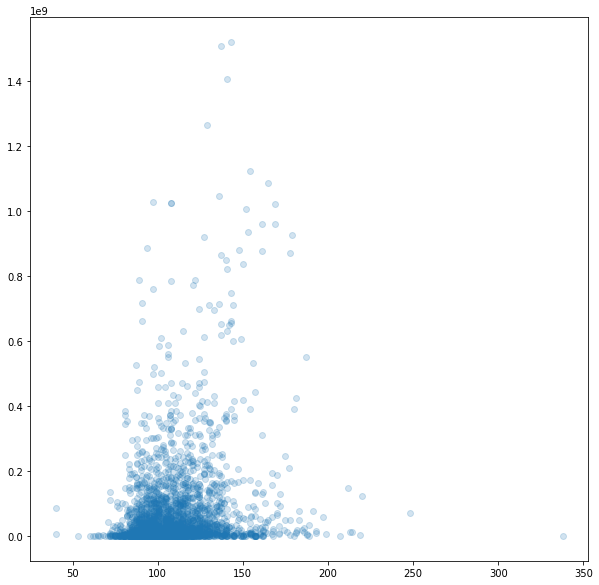

In [14]:

plt.figure(figsize=(10,10))
plt.scatter(x='runtime', y='revenue', data=data_cleaned, alpha=0.2)
plt.show()

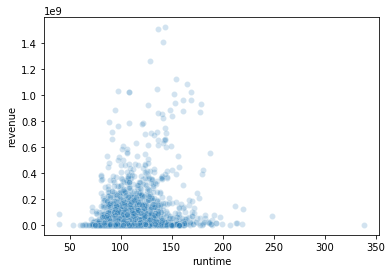

In [15]:
sns.scatterplot(x='runtime', y='revenue', data=data_cleaned, alpha=0.2)

In [16]:
import seaborn as sns

In [70]:
sns.scatterplot

AttributeError: 'module' object has no attribute 'scatterplot'

In [94]:
linModel = LinearRegression()
x = data_cleaned[['runtime']]
y = data_cleaned['revenue']
linModel.fit(x,y)
y_pred = linModel.predict(x)

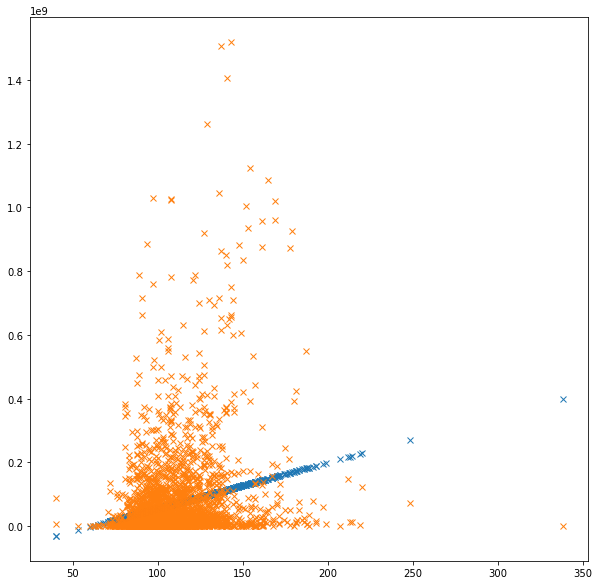

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y_pred,'x',x,y,'x')
plt.show()

In [91]:
linModel = LinearRegression()
x = np.log1p(data_cleaned[['popularity']])
y = np.log1p(data_cleaned['revenue'])
linModel.fit(x,y)
y_pred = linModel.predict(x)

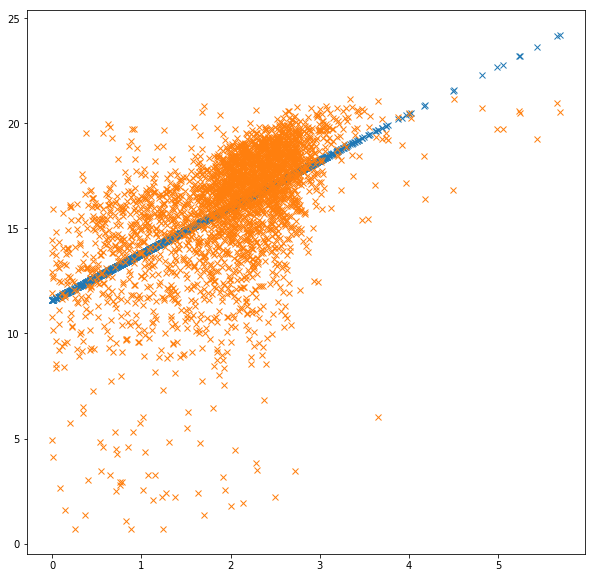

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y_pred,'x',x,y,'x')
plt.show()

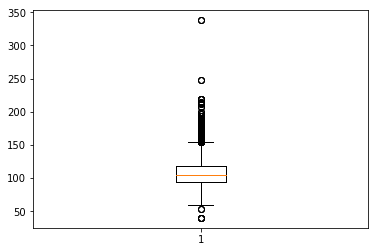

In [102]:
plt.boxplot(data_cleaned.runtime)
plt.show()

In [113]:
m = np.mean(data_cleaned.runtime)

In [114]:
varRes = sum([(xi - m)**2 for xi in data_cleaned.runtime]) / (len(data_cleaned.runtime) -1)

In [111]:
varRes, m

(439.79300389346042, 108.32261306532664)

In [112]:
np.median(data_cleaned.runtime)

104.0

In [120]:
df = pd.DataFrame(data_cleaned)
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [21]:
# Number of clusters
k = 3
# Number of training data
n = data2.shape[0]
# Number of features in the data
c = data2.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data2, axis = 0)
std = np.std(data2, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data2[:,0], data2[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

NameError: name 'data2' is not defined

In [18]:
data['original_title_length'] = data['original_title'].str.len()

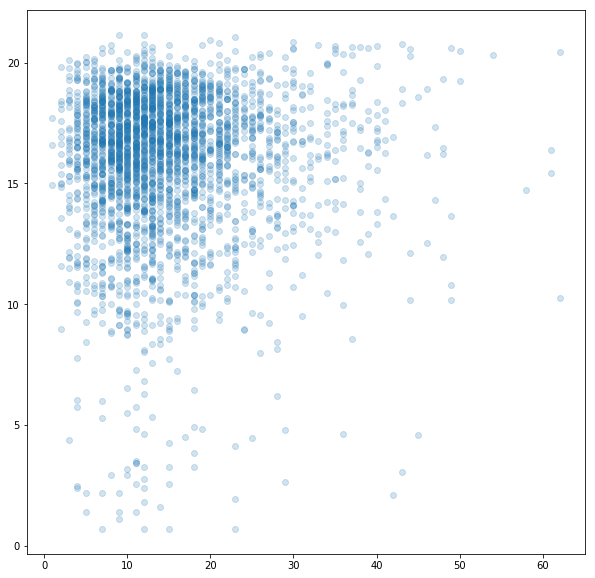

In [23]:

plt.figure(figsize=(10,10))
plt.scatter(x='original_title_length', y=np.log1p(data.revenue), data=data, alpha=0.2)
plt.show()